<a href="https://colab.research.google.com/github/amitav710/BNNusingMCMC/blob/main/BNNusingMCMCexpt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports

In [102]:
import torch
from torch.utils.data.sampler import SubsetRandomSampler
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import math

Generating our Noisy XOR Dataset

In [103]:
x1_train=np.random.random(5000)
x2_train=np.random.random(5000)
x1_test=np.random.random(1000)
x2_test=np.random.random(1000)

In [104]:
y_train=[]
for i in range(5000):
  if((x1_train[i]>0.5 and x2_train[i]>0.5) or (x1_train[i]<0.5 and x2_train[i]<0.5)):
    y_train.append(0)
  else:
    y_train.append(1)

In [105]:
y_train=np.array(y_train)

In [106]:
type(y_train)

numpy.ndarray

In [107]:
len(y_train)

5000

In [108]:
y_test=[]
for i in range(1000):
  if((x1_test[i]>0.5 and x2_test[i]>0.5) or (x1_test[i]<0.5 and x2_test[i]<0.5)):
    y_test.append(0)
  else:
    y_test.append(1)

In [109]:
y_test=np.array(y_test)

In [110]:
len(y_test)

1000

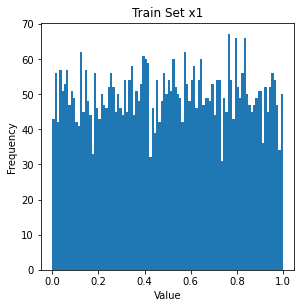

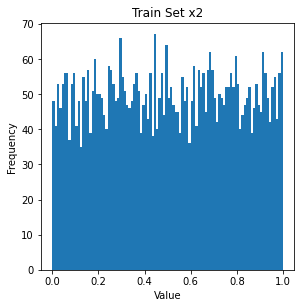

In [111]:
fig1=plt.figure(figsize=(10,10))
ax1 = fig1.add_subplot(2,2,2)
ax1.hist(x1_train,bins=100)
ax1.set_xlabel("Value")
ax1.set_ylabel("Frequency")
ax1.set_title("Train Set x1")
x1_mean=x1_train.mean()
fig2=plt.figure(figsize=(10,10))
ax2 = fig2.add_subplot(2,2,2)
ax2.hist(x2_train,bins=100)
ax2.set_xlabel("Value")
ax2.set_ylabel("Frequency")
ax2.set_title("Train Set x2")
x2_mean=x2_train.mean()

In [112]:
x1_train.shape

(5000,)

In [113]:
x1_train=x1_train.reshape(5000,1)

In [114]:
x1_train

array([[0.21473686],
       [0.6123799 ],
       [0.87131726],
       ...,
       [0.23238521],
       [0.802969  ],
       [0.52667469]])

In [115]:
x2_train=x2_train.reshape(5000,1)

In [116]:
x2_train

array([[0.02563788],
       [0.39594214],
       [0.42810528],
       ...,
       [0.6115453 ],
       [0.95283434],
       [0.09173226]])

In [117]:
train_set = np.concatenate((x1_train,x2_train), axis=1)

In [118]:
train_set

array([[0.21473686, 0.02563788],
       [0.6123799 , 0.39594214],
       [0.87131726, 0.42810528],
       ...,
       [0.23238521, 0.6115453 ],
       [0.802969  , 0.95283434],
       [0.52667469, 0.09173226]])

In [119]:
train_set.shape

(5000, 2)

In [120]:
type(train_set)

numpy.ndarray

In [121]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size=25)

Defining Important Functions

In [122]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

In [123]:
def prior(theta, mu=0, sigma=1):
  theta=np.array(theta)
  p=0
  for t in theta:
    p+=np.sum(-(t**2)/2)
  return p

In [124]:
def log_likelihood(y:np.ndarray,y_pred:np.ndarray):
  y_pred = y_pred.squeeze()
  #print(np.sum(-np.log(0.5 * np.sqrt(2* np.pi) )-((y-y_pred)**2)))
  return np.sum(-np.log(0.5 * np.sqrt(2* np.pi) )-((y-y_pred)**2))

In [125]:
def likelihood(y:np.ndarray,y_pred:np.ndarray):
  return np.exp(log_likelihood(y,y_pred))

In [126]:
def Q(theta_n):
  W=[]
  for w in theta_n:
    W.append(np.random.normal(loc=w,size=w.shape))
  return W

Creating our Functional Model

In [127]:
class BNN():
  def __init__(self):
    self.theta=[np.random.randn(2,4), np.random.randn(1,4), np.random.randn(4,1), np.random.randn(1,1)]
  def __call__(self, x:np.ndarray, wts):
    x=x@wts[0]+wts[1]
    x=sigmoid(x)
    x=x@wts[2]+wts[3]
    x=sigmoid(x)
    return x

In [128]:
network = BNN()

In [129]:
def MetropolisHasting(training_data,training_labels,epoch):
  accepted_set=[]
  x,y = training_data,training_labels
  w=network.theta
  for i in range(epoch):
    # print(w)
    w_dash=Q(w)
    # print(w_dash)
    y_pred=network(x,w)
    #print(y_pred)
    y_dash_pred=network(x,w_dash)
    w_dash_likelihood = log_likelihood(y,y_dash_pred)
    w_likelihood = log_likelihood(y,y_pred)
    w_dash_prior=prior(w)
    w_prior=prior(w)
    ratio=(w_dash_likelihood+w_dash_prior)-(w_likelihood+w_prior)-10

    print(ratio)
    if (ratio>=0):
      w=w_dash
      accepted_set.append(w_dash)
    else:
      k=np.random.binomial(1,math.exp(ratio))
      if(k):
        w=w_dash
        accepted_set.append(w_dash)
  return accepted_set

In [130]:
accepted=MetropolisHasting(train_set,y_train,30000)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


Streaming output truncated to the last 5000 lines.
-583.3345603497853
-741.0991667576579
-1162.5580254294744
-423.99704908463286
-372.08899475012345
-768.4410815835224
-2161.2877746711
-499.486236868662
-230.79427913383165
-1742.2461869379347
-723.1857532881575
-351.6098867303756
-1140.0545042280107
-1152.1285272753973
-1371.2377457737855
-820.3722296155245
-1586.5178839227594
-824.0032695552925
-800.344269254954
-1266.3478369982229
-950.222292508776
-625.8514034730572
-650.2531623199918
-1654.947559176894
-359.42699504295183
-902.6758996764277
-669.8497472237057
-976.2374833537394
-286.6840713103386
-615.4593600593114
-1531.0219331238152
-787.1194218051094
-1237.2650266113376
-1118.8658874339278
-702.5746048329827
-965.6795446347821
-2135.769839019101
-898.0768843839421
-1258.4005343540568
-843.2249804148935
-561.5198921194253
-345.8037410946065
-729.3866771878854
-1635.038183952084
-1390.892402503119
-693.6383962592347
-860.6463642540268
-396.66017632635953
-807.0054942458135
-145.47

In [131]:
len(accepted)

24

In [132]:
x1_test=x1_test.reshape(1000,1)

In [133]:
x2_test=x2_test.reshape(1000,1)

In [134]:
x_test = np.concatenate((x1_test,x2_test), axis=1)

In [135]:
x_test

array([[0.95803494, 0.01383177],
       [0.47609906, 0.19711383],
       [0.822762  , 0.57110256],
       ...,
       [0.85051344, 0.86817492],
       [0.25314526, 0.81046489],
       [0.31946145, 0.04542379]])

In [136]:
x_test.shape

(1000, 2)

In [137]:
type(x_test)

numpy.ndarray

In [138]:
correct=0
for (x,y) in zip(x_test,y_test):
  y_pred=0
  for theta in accepted:
    output = network(x,theta)
    y_pred+=output.item()
  y_hat=y_pred/len(accepted)
  if y_hat<0.5:
    y_hat=0
  else:
    y_hat=1
  if y_hat==y:
    correct+=1

In [139]:
y_test.shape

(1000,)

In [140]:
accuracy = correct/len(y_test)
print(accuracy)

0.953
